# spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [2]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 spam.csv는 라벨이 있는 데이터예요. 물론 8주차 주체가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려볼 수도 있어요!

In [3]:
spam = pd.read_csv('./spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [60]:
spam.shape

(5572, 2)

## Tokenizing
- 실습코드는 물론 한국어 대상이라 konlpy를 다뤘지만, 슬라이드 보시면 영어는 nltk 모듈을 쓸 수 있어요. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋을 것 같아요!

우선 spam.iloc[5]['v2'] 하나로만 돌려보면서 어떤 tokenizer가 가장 적절한지 선택하기로 한다.

In [4]:
import nltk

In [7]:
# 의미에 따라 분리하는 기본적인 tokenizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
print(word_tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


In [41]:
# word_tokenize와 비슷하나 구두점을 별도로 분리하는 tokenizer
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'", 's', 'been', '3', 'week', "'", 's', 'now', 'and', 'no', 'word', 'back', '!', 'I', "'", 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å', '£', '1', '.', '50', 'to', 'rcv']


apostrophe와 소수점까지 하나하나 쪼개버려서 차라리 word_tokenize이 낫다.

In [53]:
#정규표현식으로 분리하는 tokenizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'å', '1', '50', 'to', 'rcv']


특수문자를 제거하기 위해 정규표현식 tokenizer를 사용해보았지만 여전히  Ångström이 남아있기 때문에 얘보다도 word_tokenize가 낫다. tokenizer는 word_tokenize로 결정한다.

In [8]:
import re
word = re.sub('[^a-zA-Z]', ' ', spam.iloc[5]['v2'])
words = word_tokenize(word)
print(words)

['FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'to', 'rcv']


따로 특수문자 제거 전처리 과정이 필요하다고 판단하여 re.sub를 이용해 문자만 남겨준다. 뒤에서 관사나 전치사같은 불용어를 제외할 예정인데, 나머지 특수문자나 숫자는 어차피 그보다 의미를 지니지 않고 있기 때문에 문자만 남겨두기로 한다. 문자만 남긴 후 word_tokenize한 결과이다.

In [10]:
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stops = set(stopwords.words('english'))
words = [word for word in words if word not in english_stops]
print(words)

['FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'I', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'rcv']


In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

re.sub로 특수문자 및 숫자 제거 → word_tokenize → stopwords 불용어 처리까지 한 결과이다. 원래 문자열과 비교해보니 의미를 지닌 단어들만 잘 남았다.

In [11]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]
print(words)

['FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'I', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'rcv']


표제어로 변환해주어 복잡성을 낮춘다.

In [12]:
words = [word.lower() for word in words]
print(words)

['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'i', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']


소문자로 변환해주어 역시 복잡성을 낮춘다.  
이제 전체 spam 데이터를 tokenizing 해보자.

In [117]:
# import nltk
# import re
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('stopwords')
# english_stops = set(stopwords.words('english'))
# nltk.download('wordnet')
# lemmatizer = WordNetLemmatizer()


spam_token = []
for i in range(len(spam)):
    words = re.sub('[^a-zA-Z]', ' ', spam.iloc[i]['v2'])  # 특수문자 및 숫자 제거
    words = word_tokenize(words)  # tokenize
    words = [word for word in words if word not in english_stops]  # 불용어 제거
    words = [lemmatizer.lemmatize(word) for word in words]  # 표제어추출
    words = [word.lower() for word in words]  # 소문자 변환
    spam_token.append(words)

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었어요. 왜 이 임베딩 모델을 적용하게 되었는지 '비교' 결과와 함께 적어주세요!

In [14]:
from gensim.models import Word2Vec

CBOW = Word2Vec(spam_token, size=2, window=2, min_count=1, workers=1, iter=1000, sg=0)
CBOW_words = CBOW.wv.index2word
CBOW_vectors = CBOW.wv.vectors

In [98]:
CBOW_df = pd.DataFrame(CBOW_vectors, columns = ['x1', 'x2'])
CBOW_df['words'] = CBOW_words
CBOW_df = CBOW_df[['words', 'x1', 'x2']]
CBOW_df

,words,x1,x2
0,i,0.654362,-1.412184
1,u,0.654174,-0.494831
2,call,1.428023,1.952299
3,get,0.810256,0.434041
4,ur,0.942154,0.984334
...,...,...,...
7300,heap,0.723307,-4.041201
7301,lowes,0.553759,-2.862395
7302,salesman,0.572551,1.126651
7303,pity,0.658047,-5.703414


In [107]:
CBOW.most_similar('week', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('nosy', 0.9999999403953552),
 ('ring', 0.9999999403953552),
 ('surf', 0.9999999403953552),
 ('ham', 0.9999999403953552),
 ('select', 0.9999998807907104)]

In [105]:
CBOW.most_similar('happy', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('practising', 1.0),
 ('aint', 1.0),
 ('bud', 1.0),
 ('enemy', 1.0),
 ('fine', 1.0)]

In [108]:
CBOW.most_similar('customer', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('guaranteed', 1.0),
 ('dining', 1.0),
 ('reply', 1.0),
 ('biz', 1.0),
 ('ldew', 1.0)]

CBOW 유사도는 터무니없다. 유사하다 볼 수 없는 단어들만 나왔다. Skip_Gram에서는 window size 3 이외에 옵션 동일하게 돌려보았다.

In [119]:
Skip_Gram = Word2Vec(spam_token, size=2, window=3, min_count=1, workers=1, iter=1000, sg=1)
Skip_Gram_words = Skip_Gram.wv.index2word
Skip_Gram_vectors = Skip_Gram.wv.vectors

Skip_Gram_df = pd.DataFrame(Skip_Gram_vectors, columns = ['x1', 'x2'])
Skip_Gram_df['words'] = Skip_Gram_words
Skip_Gram_df = Skip_Gram_df[['words', 'x1', 'x2']]

In [120]:
Skip_Gram.most_similar('week', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('chap', 0.9999998807907104),
 ('devils', 0.9999998807907104),
 ('intha', 0.9999996423721313),
 ('goal', 0.9999990463256836),
 ('ml', 0.999998927116394)]

In [121]:
Skip_Gram.most_similar('happy', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('imma', 1.0),
 ('offense', 1.0),
 ('felt', 1.0),
 ('impede', 0.9999999403953552),
 ('thing', 0.9999999403953552)]

In [122]:
Skip_Gram.most_similar('customer', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('utele', 1.0),
 ('regalportfolio', 1.0),
 ('ny', 1.0),
 ('onto', 1.0),
 ('ringtoneking', 1.0)]

CBOW에 비해 크게 낫다고 보기 어렵다. 옵션값을 늘려보기로 한다.

In [130]:
Skip_Gram = Word2Vec(spam_token, size=100, window=5, min_count=1, workers=1, iter=1000, sg=1)
Skip_Gram_words = Skip_Gram.wv.index2word
Skip_Gram_vectors = Skip_Gram.wv.vectors

In [131]:
CBOW.most_similar('week', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('min', 0.32181063294410706),
 ('semester', 0.31971925497055054),
 ('month', 0.3171654939651489),
 ('wk', 0.30533984303474426),
 ('saturday', 0.3046000599861145)]

In [132]:
CBOW.most_similar('happy', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('merry', 0.3190174102783203),
 ('air', 0.3068758249282837),
 ('cabin', 0.3057338297367096),
 ('sweet', 0.2924387454986572),
 ('christmas', 0.2922725975513458)]

In [133]:
CBOW.most_similar('customer', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('code', 0.3745417892932892),
 ('content', 0.32431474328041077),
 ('awaiting', 0.3172096908092499),
 ('unsubscribe', 0.30219221115112305),
 ('dating', 0.3000642657279968)]

임베딩 차원을 늘렸더니 week-(semester,month,saturday), happy-(merry,sweet, christmas), customer-(unsubscribe) 이렇게 유사한 단어들이 나오는 것을 확인할 수 있다.

마지막으로 FastText를 돌려보기로 한다. 옵션값은 동일하게 두었다.

In [86]:
from gensim.models import FastText

Fastext = FastText(spam_token, size=100, window=5, min_count=5, workers=4, sg=1)
Fastext_words = Fastext.wv.index2word
Fastext_vectors = Fastext.wv.vectors

In [137]:
Fastext.most_similar('week', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('every', 0.9837372303009033),
 ('games', 0.9837229251861572),
 ('st', 0.9837208986282349),
 ('age', 0.9823904037475586),
 ('game', 0.9817243814468384)]

In [138]:
Fastext.most_similar('happy', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('have', 0.9907378554344177),
 ('love', 0.9884514808654785),
 ('hope', 0.9878665804862976),
 ('happen', 0.9867247939109802),
 ('morning', 0.9866987466812134)]

In [139]:
Fastext.most_similar('customer', topn=5)

C:\Users\tpdud\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('service', 0.9960663318634033),
 ('receive', 0.9956194162368774),
 ('offer', 0.9954560399055481),
 ('services', 0.9946961402893066),
 ('to', 0.9938416481018066)]

FastText에서는 week-(every), happy-(love, hope), customer-(service,receive,offer,services) 이렇게 유사한 단어가 뽑혔다.

Fasttext가 미세하게 좀 더 유사한 단어를 보였다고 판단한다. 임베딩은 Fastext로 결정한다.

In [16]:
Fastext_vectors.shape

(1708, 100)

## 본인이 도출해낸 해석을 적어주세요!

- Plot, Wordcloud, 이진 분류 모델, 유사도 뭐든 관계없으니 분명하고 인상적인 해석 부탁드려요!

위에서 세가지 임베딩 모델의 유사도를 비교해보았다. 기본적으로 size 임베드 차원을 늘려줘야 좋은 결과를 보였고, Skip_Gram보다 FastText가 미세하게 좀 더 나은 결과를 보였다고 판단했다. week-(every), happy-(love, hope), customer-(service,receive,offer,services)  
간단한 시각화와 분류 모델 학습을 진행해보기로 한다.

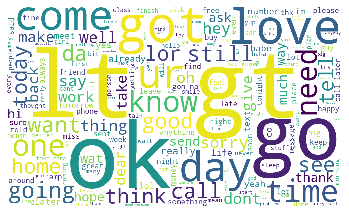

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ham_index = spam.loc[spam.v1=='ham',].index

ham_oneline = ""
for i in ham_index:
    for j in spam_token[i]:
        ham_oneline = ham_oneline + j + " "

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(ham_oneline))
plt.axis("off")
plt.show()

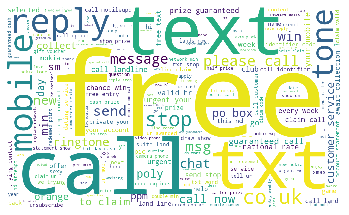

In [116]:
spam_index = spam.loc[spam.v1=='spam',].index

spam_oneline = ""
for i in spam_index:
    for j in spam_token[i]:
        spam_oneline = spam_oneline + j + " "

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(spam_oneline))
plt.axis("off")
plt.show()

문서 전체적으로 많이 등장하는 단어를 살펴보기 위해 워드클라우드를 그려보았다.  
spam이 아닌 데이터의 경우 주로 일상적인 텍스트 데이터이다보니 '오고가다', '시간, 시점', '감정'에 관한 단어가 많이 등장하는 것을 볼 수 있다.  
그에 비해 spam인 데이터의 경우 'free', 'text', 'reply' 등 스팸이나 광고 관련 단어들이 많이 등장하는 것을 확인할 수 있다.  
observation 별로 워드클라우드를 그려보는 건 의미가 없을 것 같아 (그냥 원래 데이터 문장을 보는거랑 다를 바 없다고 생각) 라벨링만 구분하여 전체 데이터로 워드클라우드를 그려보았다.

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string

vectorizer = TfidfVectorizer("english")

spam_vector = []
for i in spam_token:
    sentence = ""
    for j in i:sentence = sentence + j + " " 
    spam_vector.append(sentence)

X_vector = vectorizer.fit_transform(spam_vector)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_vector,spam.v1,test_size=0.2, random_state=111)
svc = SVC(kernel='rbf', gamma=1.0)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)
accuracy_score(y_test,prediction)

0.9820627802690582

분류모델을 돌려보기 위해 TF-IDF로 벡터화를 진행해보았다. 앞서 이미 불용어와 특수문자 등은 처리를 해두었기 때문에 spam_token을 observation별로 다시 한 문장으로 묶어놓고 벡터화를 진행하였다.  
이후 train과 test split, 모델은 SVM으로 이진 분류를 시도한 결과 0.98의 정확도를 얻을 수 있었다. 앞선 전처리가 어느정도 잘 된 것 같다.